In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.models import Sequential

# Visualizing the Data

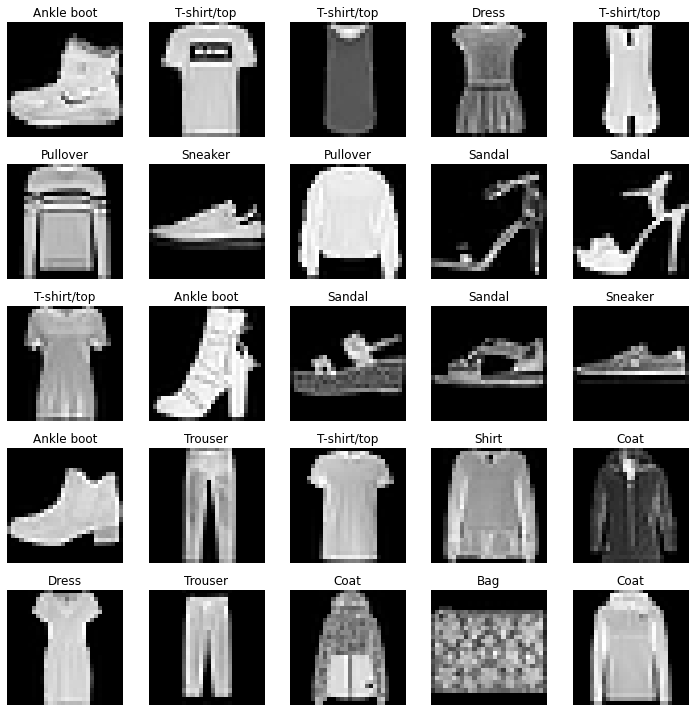

In [5]:
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class labels
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# Plot a sample of the training images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(class_labels[y_train[i]])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Loading and Preprocessing

In [6]:
x_train =x_train.reshape((60000, 28,28,1))
x_test = x_test.reshape((10000, 28,28,1))
x_train = x_train/255.0
x_test = x_test/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# CNN Model

In [7]:
model =Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [9]:
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data= (x_test, y_test))

Epoch 1/10
938/938 [==============================] - 28s 29ms/step - loss: 0.4389 - accuracy: 0.8473 - val_loss: 0.3697 - val_accuracy: 0.8675
Epoch 2/10
938/938 [==============================] - 27s 28ms/step - loss: 0.3022 - accuracy: 0.8924 - val_loss: 0.3095 - val_accuracy: 0.8908
Epoch 3/10
938/938 [==============================] - 27s 29ms/step - loss: 0.2594 - accuracy: 0.9069 - val_loss: 0.2774 - val_accuracy: 0.9011
Epoch 4/10
938/938 [==============================] - 27s 29ms/step - loss: 0.2309 - accuracy: 0.9163 - val_loss: 0.2650 - val_accuracy: 0.9050
Epoch 5/10
938/938 [==============================] - 27s 28ms/step - loss: 0.2046 - accuracy: 0.9267 - val_loss: 0.2626 - val_accuracy: 0.9073
Epoch 6/10
938/938 [==============================] - 27s 29ms/step - loss: 0.1875 - accuracy: 0.9309 - val_loss: 0.2556 - val_accuracy: 0.9077
Epoch 7/10
938/938 [==============================] - 27s 28ms/step - loss: 0.1681 - accuracy: 0.9394 - val_loss: 0.2680 - val_accuracy:

In [13]:
accuracy = model.evaluate(x_test, y_test)
print(accuracy[1]*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.2721 - accuracy: 0.9114
91.14000201225281


# Accuracy is 91.14%